3. Problem Statement



Write a Python program to draw a 3D plot that visualizes the regression model for house price prediction using suitable Python-based 3D plotting libraries.



Assume the following features were used:

Area (sq ft)

Number of Bedrooms

House Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


In [2]:
data = {
    'Area': [800, 1000, 1200, 1500, 1800, 2000, 2200, 2500],
    'Bedrooms': [1, 2, 2, 3, 3, 4, 4, 5],
    'Price': [50, 65, 75, 95, 110, 130, 150, 180]  # in lakhs
}

df = pd.DataFrame(data)


In [3]:
X = df[['Area', 'Bedrooms']]
y = df['Price']


In [4]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [5]:
area_range = np.linspace(df['Area'].min(), df['Area'].max(), 20)
bedroom_range = np.linspace(df['Bedrooms'].min(), df['Bedrooms'].max(), 20)

area_grid, bedroom_grid = np.meshgrid(area_range, bedroom_range)

price_pred = model.predict(
    np.c_[area_grid.ravel(), bedroom_grid.ravel()]
)

price_grid = price_pred.reshape(area_grid.shape)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


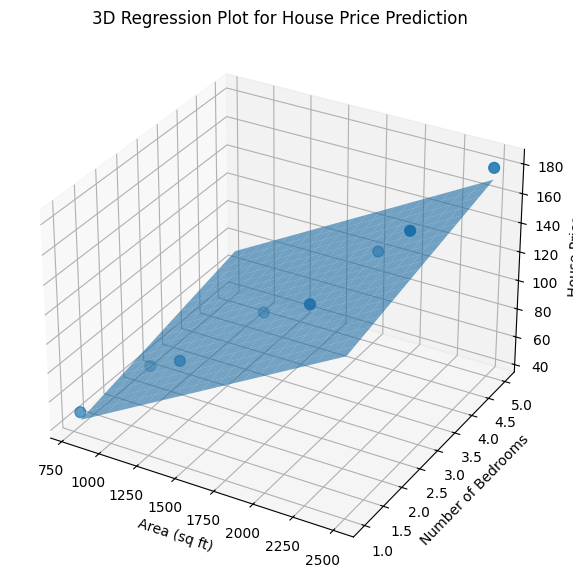

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(
    df['Area'], df['Bedrooms'], df['Price'],
    s=60, label='Actual Data'
)

# Regression surface
ax.plot_surface(
    area_grid, bedroom_grid, price_grid,
    alpha=0.6
)

# Labels
ax.set_xlabel('Area (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('House Price')

ax.set_title('3D Regression Plot for House Price Prediction')

plt.show()
